In [5]:
from mrcnn.config import Config
from mrcnn import model as modellib, utils
from mrcnn import visualize
from timer import Timer
import os
import cv2
import skimage.io
# images = cv2.imread('images/test/t1.jpg')

import time
import random

In [6]:
class WTOTTConfig(Config):
    """Configuration for training on the toy  dataset.
    Derives from the base Config class and overrides some values.
    """
    NAME = "wtott"
    IMAGES_PER_GPU = 1
    NUM_CLASSES = 1 + 2  # Background + classes
    DETECTION_MIN_CONFIDENCE = 0.9


In [7]:
config = WTOTTConfig()
model = modellib.MaskRCNN(mode="inference", config=config,
                                  model_dir='models')
model.load_weights('models/mask_rcnn_wtott_0029.h5', by_name=True)

class_names = ['BG', 'WT', 'OTT']

用时： 24.002s 
分数：[0.9999683]
类别：WT


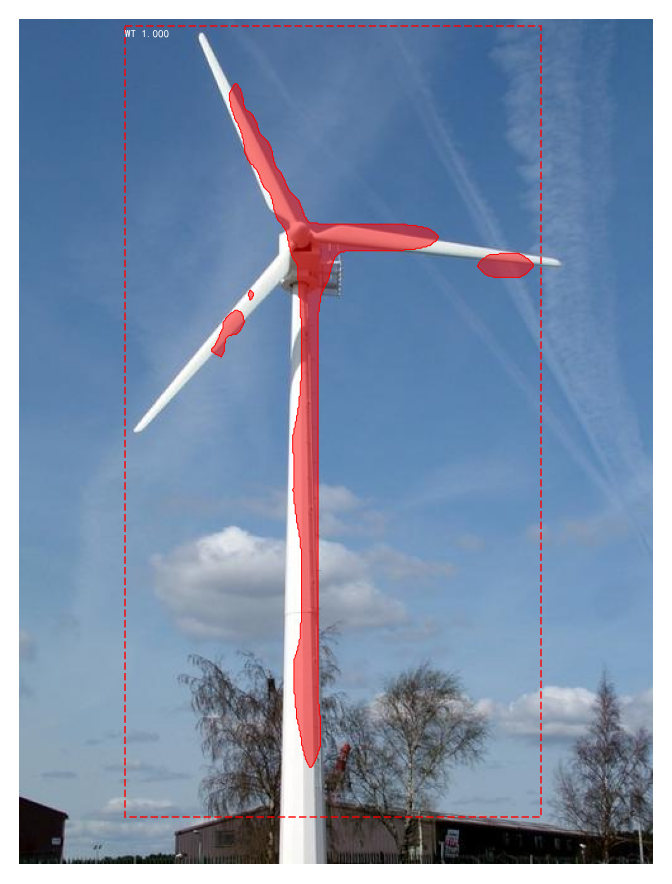

用时： 24.685s 
分数：[0.9998109]
类别：OTT


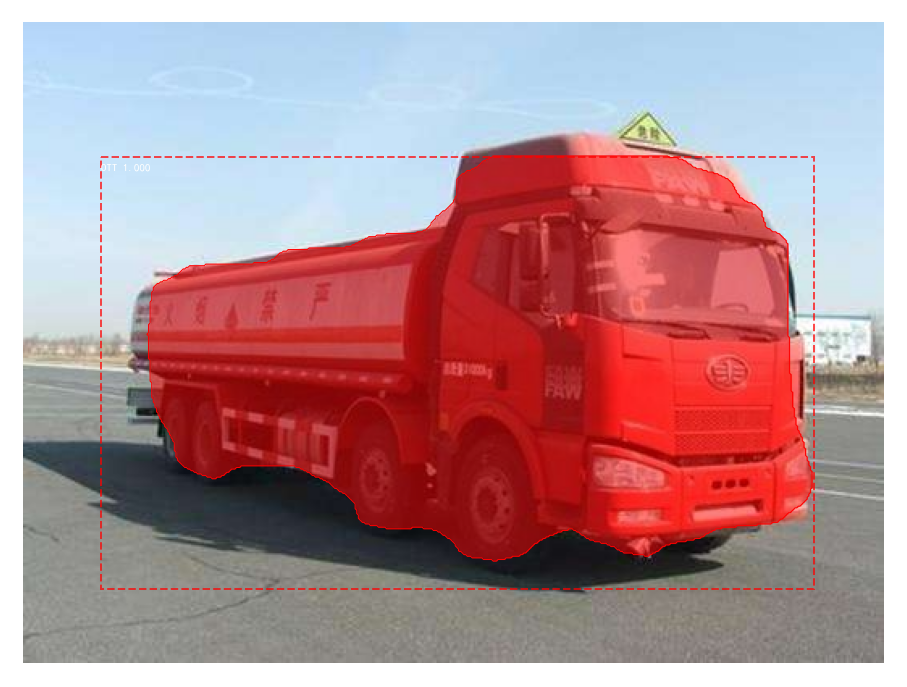

In [10]:
IMAGE_DIR = 'images/test'
file_names = next(os.walk(IMAGE_DIR))[2]
# print(file_names)
for image in file_names:
#     images = cv2.imread('images/test/3.jpg')
    images = skimage.io.imread(os.path.join(IMAGE_DIR, image))
    time1 = time.time()
    results = model.detect([images])
    time2 = time.time()
    print('用时： {:.3f}s '.format(time2-time1))
    r = results[0]
    print('分数：{}'.format(r['scores']))
    visualize.display_instances(images, r['rois'], r['masks'], r['class_ids'],
                                class_names, r['scores'])